Generating Fake Data

In [2]:
from sklearn.datasets._samples_generator import  make_regression 
X, y = make_regression(n_samples = 200, n_features = 1, n_informative = 1, noise = 6, bias = 30, random_state = 200) 
m = 200

Visualizing the Data

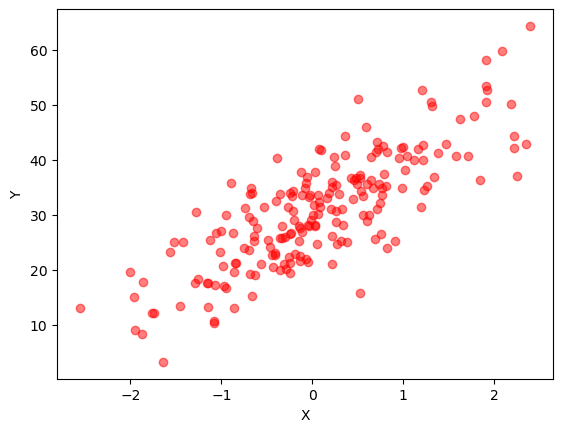

In [3]:
from matplotlib import pyplot as plt 
plt.scatter(X,y, c = "red", alpha=.5, marker = 'o') 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 

Linear Model 

In [4]:
import numpy as np 

# numpy speeds up the calculation using vectorized format - parallel computing 

def h(X,w):
    return (w[1]*np.array(X[:, 0])+w[0])

Cost Function

In [5]:
def cost(w, X, y):
    return (0.5/m)*np.sum(np.square(h(X,w)-np.array(y)))

Gradient Descent

In [6]:
def grad(w, X, y): 
    g = [0]*2 
    g[0] = (1/m)*np.sum(h(X,w)-np.array(y))
    g[1] = (1/m)*np.sum((h(X,w)-np.array(y))*np.array(X[:, 0]))
    return g

In [13]:
def descent(w_new, w_prev, lr): 
    print(w_prev)
    print(cost(w_prev, X, y)) 
    j = 0 
    while True: 
        w_prev = w_new 
        w0 = w_prev[0] - lr*grad(w_prev, X, y)[0] 
        w1 = w_prev[1] - lr*grad(w_prev, X, y)[1] 
        w_new = [w0, w1]
        print(w_new) 
        print(cost(w_new, X, y)) 
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 <= pow(10,-6): 
            return w_new 
        if j > 500: 
            return w_new 
        j += 1 

Initializing Parameters 

In [14]:
w = [0, -1] 

Training the model 

In [15]:
w_new = descent(w,w,.01) 
print(w_new)

[0, -1]
540.5360663843456
[0.30956308633447543, -0.8885572290119184]
529.7674280477665
[0.615948021511844, -0.7783795579400702]
519.2214204828034
[0.9191875238152215, -0.6694528741609032]
508.89343596270936
[1.2193139738948846, -0.5617632204567682]
498.77896221514925
[1.5163594182596731, -0.45529679332139117]
488.87358044316636
[1.8103555727322231, -0.3500399412836802]
479.17296338720786
[2.1013338258684073, -0.24597916324967234]
469.6728734273567
[2.3893252423413527, -0.1431011068624239]
460.36916072493494
[2.6743605662904026, -0.04139256687965172]
451.2577614026626
[2.9564702246353907, 0.059159516431065665]
442.33469576257005
[3.2356843303565808, 0.15856805887971603]
433.5960665408807
[3.5120326857406337, 0.2568458339240973]
425.0380571990974
[3.7855447855929505, 0.3540054742230622]
416.6569302505401
[4.056249820416744, 0.4500594731729465]
408.44902562159916
[4.324176679559179, 0.545020186427362]
400.4107590469842
[4.589353954324929, 0.6388998334005337]
392.5386204982615
[4.851809941

Visualizing the result 

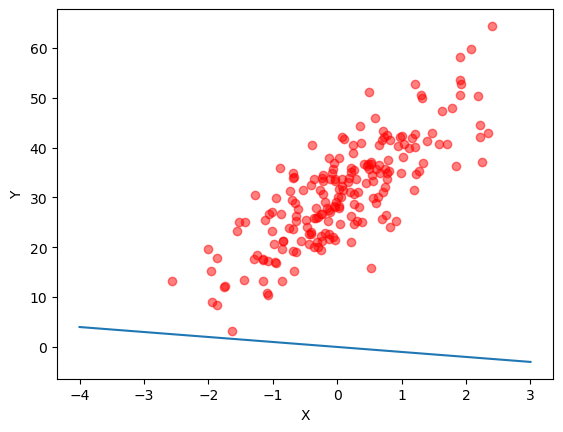

In [16]:
def graph(formula, x_range): 
    x = np.array(x_range) 
    y = formula(x) 
    plt.plot(x, y) 

def my_formula(x): 
    return w[0] + w[1]*x 

plt.scatter(X, y, c = 'red', alpha= .5, marker= 'o') 
graph(my_formula, range(-4,4)) 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.show() 